In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf 
from mpl_toolkits import mplot3d


In [2]:
pi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_pi.csv',header= None))
dpi = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_dpi.csv',header= None))
V = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Training_Data/symetric_training_data_V.csv',header = None))
df_pions = np.hstack((pi,dpi,V))
np.random.shuffle(df_pions)
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:-2]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:-2]), df_pions[-1000:,-1]



In [3]:
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:8]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:8]), df_pions[-1000:,-1]

In [4]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.7, beta_2= 0.99)
#inital_test = cf.trained_network(train_x[:100],train_y[:100],val_x,val_y,[512,512], optimizer= opt, verbose= 0).history


I think I want a b1,b2 array at which I evaluate the minimum point for all of these I think again this should be a mean from 10

In [5]:

def adam_tester(num_beta_1D,repeats,section = None):
    beta_range = np.linspace(0.5,0.99,num_beta_1D)
    mae_min = np.zeros((num_beta_1D,num_beta_1D,repeats))
    a = 0
    for i in range(num_beta_1D):
        for j in range(num_beta_1D):
            a += 1
            print('#',a)
            opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = beta_range[i], beta_2= beta_range[j])
            for k in range(repeats):
                mae_min[i,j,k] = np.min(cf.trained_network(train_x[:section],train_y[:section],val_x,val_y,[512,512], optimizer= opt, verbose= 0).history['val_mean_absolute_error'])
    return mae_min, beta_range



In [6]:
mape_min_multiple, beta_range = adam_tester(10,5)

# 1


2021-11-22 10:12:43.146518: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 10:12:43.152231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 10:12:43.152537: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-22 10:12:43.153246: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

InternalError:  Attempting to perform BLAS operation using StreamExecutor without BLAS support
	 [[node sequential_1/dense_3/MatMul (defined at home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/Common_Functions.py:52) ]] [Op:__inference_train_function_790]

Function call stack:
train_function


In [ ]:

min_mae_2d = mape_min_multiple.reshape(mape_min_multiple.shape[0],-1)

In [ ]:
np.savetxt('adam_beta_test.csv',min_mae_2d,delimiter=',')

In [7]:
loaded_reshape = np.loadtxt('adam_beta_test.csv',delimiter= ',')
loaded_mae_min = loaded_reshape.reshape(10,100//10,10)

In [8]:
print(loaded_mae_min.shape)
if np.isclose(mape_min_multiple,loaded_mae_min).all:
    print('fuck yes')
else: 
    print('dum cunt ')

(10, 10, 10)


NameError: name 'mape_min_multiple' is not defined

In [26]:
mean_mae_min = np.nan_to_num(np.mean(loaded_mae_min,axis = 2),nan = 0.15)
beta_range = np.linspace(0.5,0.99,10)

In [27]:
#mean_mae_min[np.where(mean_mae_min>10)] = 0.03
beta_range_array = np.ones_like(mean_mae_min)*beta_range
beta_range_array_2 = beta_range_array.transpose()

Text(0.5, 0, 'Mean Minimum MAE')

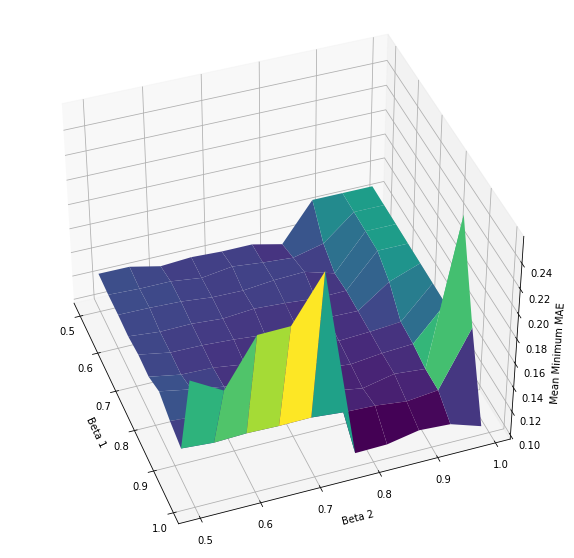

In [28]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(beta_range_array, beta_range_array_2, mean_mae_min , cmap = 'viridis')
ax.view_init(40,340)
ax.set_xlabel('Beta 1')
ax.set_ylabel('Beta 2')
ax.set_zlabel('Mean Minimum MAE')

In [12]:
fig.savefig('../Figures/Adam_Beta_parameters_contour_plot.png',dpi = 300)

In [13]:
print(np.where(np.min(mean_mae_min) ==mean_mae_min))
print('Optimised beta 1 =', beta_range_array[7,9],'Optimised Beta 2 =', round(beta_range_array_2[7,9],3))

(array([9]), array([9]))
Optimised beta 1 = 0.99 Optimised Beta 2 = 0.881


In [ ]:
print(beta_range[7],beta_range[9])
print(np.min(mean_mae_min))

0.8811111111111111 0.99
0.09991622269153595


Best Beta value 
B1 = 0.881
B2 = 0.99